In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
n_customers = 100

# Fiction Lovers: buy more fiction books
fiction_lovers = np.random.multinomial(30, [0.7, 0.2, 0.1], size=n_customers // 3)

# Students: buy more textbooks
students = np.random.multinomial(30, [0.1, 0.7, 0.2], size=n_customers // 3)

# Parents: buy more children's books
parents = np.random.multinomial(30, [0.2, 0.1, 0.7], size=n_customers // 3)

# Combine all customer data
data = np.vstack([fiction_lovers, students, parents])
labels_true = np.array([0] * (n_customers // 3) + [1] * (n_customers // 3) + [2] * (n_customers // 3))

# Convert to DataFrame for better visualization
df = pd.DataFrame(data, columns=['Fiction', 'Textbooks', 'Children'])
df['TrueLabel'] = labels_true
df

,Fiction,Textbooks,Children,TrueLabel
0,22,3,5,0
1,19,7,4,0
2,24,5,1,0
3,25,2,3,0
4,20,6,4,0
...,...,...,...,...
94,6,2,22,2
95,3,6,21,2
96,9,3,18,2
97,5,2,23,2


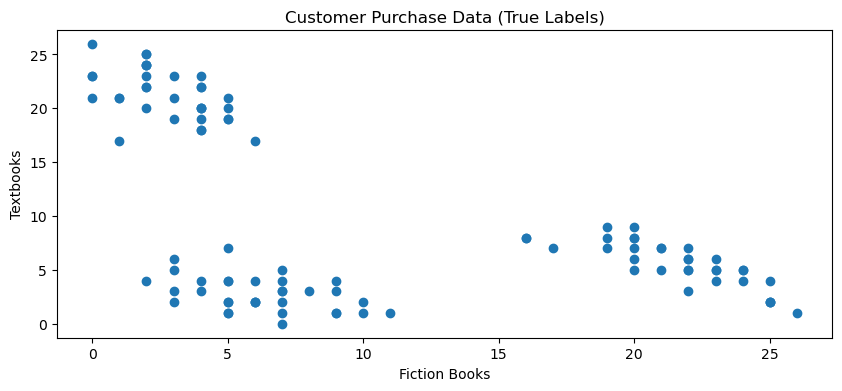

In [2]:
def plot_initial_data(df):
    plt.figure(figsize=(10, 4))
    plt.scatter(df['Fiction'], df['Textbooks'], marker='o')
    plt.xlabel('Fiction Books')
    plt.ylabel('Textbooks')
    plt.title('Customer Purchase Data (True Labels)')
    plt.show()

plot_initial_data(df)

c:\Users\Balu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Balu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


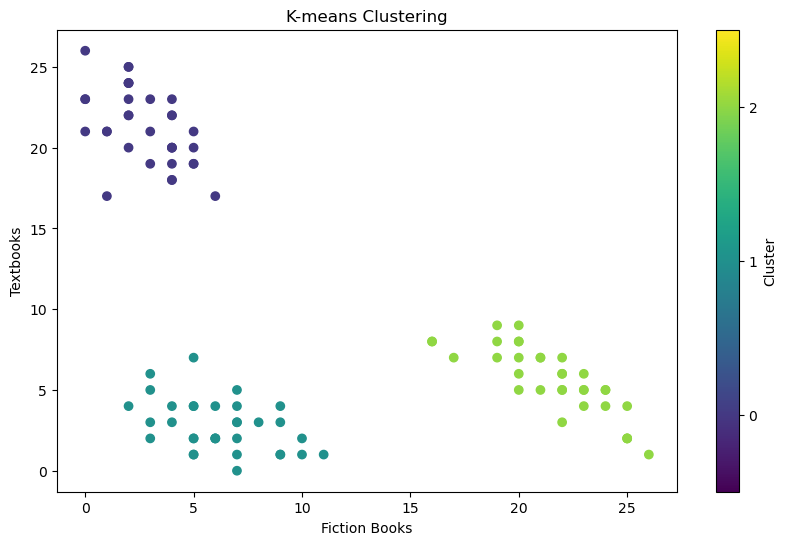

In [3]:
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeansLabel'] = kmeans.fit_predict(df[['Fiction', 'Textbooks', 'Children']])

# Visualize K-means clustering
def plot_kmeans_clusters(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Fiction'], df['Textbooks'], c=df['KMeansLabel'], 
                cmap='viridis', marker='o')
    plt.xlabel('Fiction Books')
    plt.ylabel('Textbooks')
    plt.title('K-means Clustering')
    plt.colorbar(ticks=[0, 1, 2], label='Cluster')
    plt.clim(-0.5, 2.5)
    plt.show()

plot_kmeans_clusters(df)

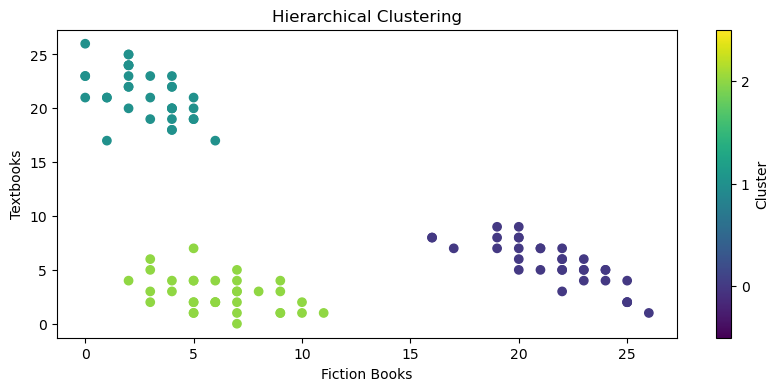

In [4]:
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df['HierarchicalLabel'] = hierarchical.fit_predict(df[['Fiction', 'Textbooks', 'Children']])

# Visualize Hierarchical clustering
def plot_hierarchical_clusters(df):
    plt.figure(figsize=(10, 4))
    plt.scatter(df['Fiction'], df['Textbooks'], c=df['HierarchicalLabel'], cmap='viridis', marker='o')
    plt.xlabel('Fiction Books')
    plt.ylabel('Textbooks')
    plt.title('Hierarchical Clustering')
    plt.colorbar(ticks=[0, 1, 2], label='Cluster')
    plt.clim(-0.5, 2.5)
    plt.show()

plot_hierarchical_clusters(df)

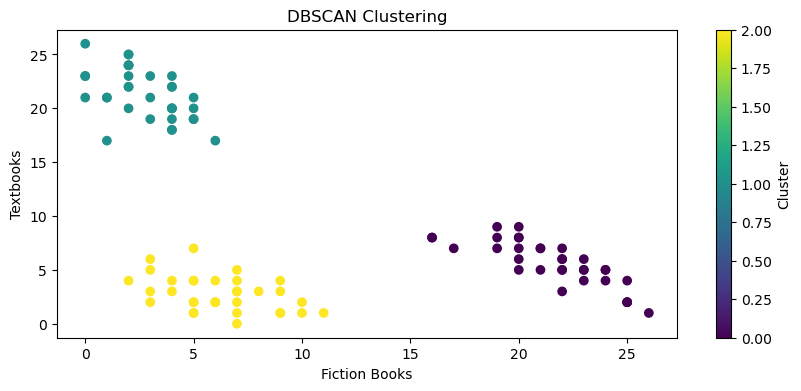

In [5]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=5, min_samples=5)
df['DBSCANLabel'] = dbscan.fit_predict(df[['Fiction', 'Textbooks', 'Children']])

# Visualize DBSCAN clustering
def plot_dbscan_clusters(df):
    plt.figure(figsize=(10, 4))
    plt.scatter(df['Fiction'], df['Textbooks'], c=df['DBSCANLabel'], cmap='viridis', marker='o')
    plt.xlabel('Fiction Books')
    plt.ylabel('Textbooks')
    plt.title('DBSCAN Clustering')
    plt.colorbar(label='Cluster')
    plt.show()

plot_dbscan_clusters(df)
